# Working with several networks

When one single network isn't enough.

---

- Website: https://discovery.gitlabpages.inria.fr/enoslib/index.html
- Instant chat: https://framateam.org/enoslib


---

**Prerequisites:**
- A Grid'5000 account
- A working EnOSlib environment and Jupyter (not included in EnOSlib dependencies, but `pip install jupyterlab` will install it)




## Setup

In [1]:
import enoslib as en

# get some logging info
import logging
logging.basicConfig(level=logging.INFO)

We reserve two nodes (with at least two network interfaces), the first network interface of each node will use the production network of Grid'5000 (not isolated network) while a second network interface will be £configured to use a Vlan.

- To find out which machine have at least two network cards, you can refer to the [hardware page of Grid'5000](https://www.grid5000.fr/w/Hardware)
- To know more about Vlans on Grid'5000, you can refer to this [page](https://www.grid5000.fr/w/KaVLAN)

In [2]:
SITE = "rennes"

network = en.G5kNetworkConf(id="n1", type="prod", roles=["public"], site=SITE)
private = en.G5kNetworkConf(id="n2", type="kavlan", roles=["private"], site=SITE)

conf = (
    en.G5kConf.from_settings(job_name="enoslib_several_networks")
        .add_network_conf(network)
        .add_network_conf(private)
        .add_machine(
            roles=["server", "xp"],
            cluster="paravance",
            nodes=1,
            primary_network=network,
            secondary_networks=[private],
        )
        .add_machine(
            roles=["client", "xp"],
            cluster="paranoia",
            nodes=1,
            primary_network=network,
            secondary_networks=[private],
        )
        .finalize()
)
conf

Conf@0x7fd0daa9a6d0
{
    "dhcp": true,
    "force_deploy": false,
    "env_name": "debian10-x64-nfs",
    "job_name": "enoslib_several_networks",
    "job_type": [
        "deploy"
    ],
    "key": "/home/msimonin/.ssh/id_rsa.pub",
    "queue": "default",
    "walltime": "02:00:00",
    "resources": {
        "machines": [
            {
                "roles": [
                    "server",
                    "xp"
                ],
                "primary_network": "n1",
                "secondary_networks": [
                    "n2"
                ],
                "cluster": "paravance",
                "nodes": 1
            },
            {
                "roles": [
                    "client",
                    "xp"
                ],
                "primary_network": "n1",
                "secondary_networks": [
                    "n2"
                ],
                "cluster": "paranoia",
                "nodes": 1
            }
        ],
        "networks": [
            {
                "id": "n1",
                "type": "prod",
                "roles": [
                    "public"
                ],
                "site": "rennes"
            },
            {
                "id": "n2",
                "type": "kavlan",
                "roles": [
                    "private"
                ],
                "site": "rennes"
            }
        ]
    }
}

In [3]:
provider = en.G5k(conf)
roles, networks = provider.init()
roles

INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from lille
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from luxembourg
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from lyon
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from nancy
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from nantes
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from rennes
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading 1816394 from rennes
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from sophia
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Waiting for 1816394 on rennes [2021-08-27 15:31:41]
INFO:enoslib.infra.enos_g5k.g5k_api_utils:All jobs are Running !


{'server': [Host(address='paravance-8.rennes.grid5000.fr', alias='paravance-8.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())], 'xp': [Host(address='paravance-8.rennes.grid5000.fr', alias='paravance-8.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set()), Host(address='paranoia-4.rennes.grid5000.fr', alias='paranoia-4.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())], 'client': [Host(address='paranoia-4.rennes.grid5000.fr', alias='paranoia-4.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())]}

## Get the network information of your nodes

First we retrieve the network information by syncing the Host description with the remote machines.

In [4]:
roles = en.sync_info(roles, networks)
roles

[WARNING]: No inventory was parsed, only implicit localhost is available



PLAY [all] ************************************************************************************************************************************************

TASK [hostname] *******************************************************************************************************************************************
 [started TASK: hostname on paravance-8.rennes.grid5000.fr]
 [started TASK: hostname on paranoia-4.rennes.grid5000.fr]
changed: [paravance-8.rennes.grid5000.fr]
changed: [paranoia-4.rennes.grid5000.fr]

PLAY [Gather facts for all hosts] *************************************************************************************************************************

TASK [Gathering Facts] ************************************************************************************************************************************
ok: [paranoia-4.rennes.grid5000.fr]
ok: [paravance-8.rennes.grid5000.fr]

TASK [setup] ***********************************************************************************

ip
10.24.6.8/18
fe80::eef4:bbff:fed1:182/64
ip
::1/128
127.0.0.1/8
ip
fe80::eef4:bbff:fed1:180/64
172.16.96.8/20
ip
fe80::901e:35ff:feaa:1b/64


We can now filter the network addresses of the nodes given a network

In [5]:
server = roles["server"][0]
server.filter_addresses(networks=networks["private"])

[IPAddress(network=<enoslib.infra.enos_g5k.objects.G5kEnosVlan4Network object at 0x7fd0da184fd0>, ip=IPv4Interface('10.24.6.8/18'))]

In [6]:
ip_address = server.filter_addresses(networks=networks["private"])[0]
str(ip_address.ip.ip)

'10.24.6.8'

In [7]:
server.filter_addresses(networks=networks["public"])

[IPAddress(network=<enoslib.infra.enos_g5k.objects.G5kEnosProd4Network object at 0x7fd0e4179f10>, ip=IPv4Interface('172.16.96.8/20'))]

## A simple load generation tool

We are using [flent](https://flent.org/), a convenient client to netperf that is able to play different network benchmarks.

Roughly, Flent connects to a Netperf servers, starts a benchmark and collect metrics in various format (csv, images ... ).
That makes a good candidates when you need to get a quick insight into the performance of the network between your nodes

In [8]:
with en.actions(roles=roles) as a:
    a.apt_repository(
        repo="deb http://deb.debian.org/debian stretch main contrib non-free",
        state="present",
    )
    a.apt(
        name=["flent", "netperf", "python3-setuptools", "python3-matplotlib"],
        state="present",
    )


PLAY [all] ************************************************************************************************************************************************

TASK [apt_repository] *************************************************************************************************************************************
 [started TASK: apt_repository on paravance-8.rennes.grid5000.fr]
 [started TASK: apt_repository on paranoia-4.rennes.grid5000.fr]
ok: [paravance-8.rennes.grid5000.fr]
ok: [paranoia-4.rennes.grid5000.fr]

TASK [apt] ************************************************************************************************************************************************
 [started TASK: apt on paravance-8.rennes.grid5000.fr]
 [started TASK: apt on paranoia-4.rennes.grid5000.fr]
ok: [paravance-8.rennes.grid5000.fr]
ok: [paranoia-4.rennes.grid5000.fr]


In [9]:
server_address = str(server.filter_addresses(networks=networks["private"])[0].ip.ip)

with en.actions(pattern_hosts="server", roles=roles) as a:
    a.shell("netperf", background=True) # this is somehow idempotent .. will fail silently if netperf isn't there
    a.wait_for(port=12865, state="started", task_name="Waiting for netperf to be ready")

with en.actions(pattern_hosts="client", roles=roles) as a:
    a.shell(
        " flent tcp_upload -p totals "
        " -l 60 "
        f" -H { server_address } "
        " -t 'tcp_upload test' "
        " -o result.png"
    )
    a.fetch(src="result.png", dest="result")


PLAY [server] *********************************************************************************************************************************************

TASK [netperf] ********************************************************************************************************************************************
 [started TASK: netperf on paravance-8.rennes.grid5000.fr]
changed: [paravance-8.rennes.grid5000.fr]

TASK [Waiting for netperf to be ready] ********************************************************************************************************************
 [started TASK: Waiting for netperf to be ready on paravance-8.rennes.grid5000.fr]
ok: [paravance-8.rennes.grid5000.fr]

PLAY [client] *********************************************************************************************************************************************

TASK [flent tcp_upload -p totals  -l 60  -H 10.24.6.8  -t 'tcp_upload test'  -o result.png] **********************************************************

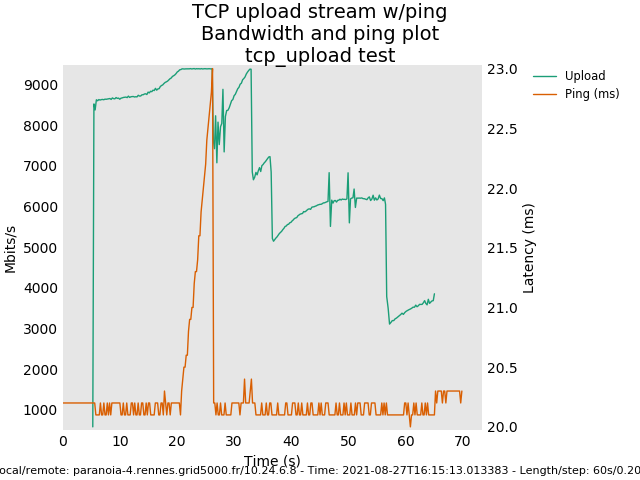

In [10]:
from IPython.display import Image
Image(f"result/{roles['client'][0].alias}/result.png")

## Emulating the network conditions

We'll illustrate how network constraints can be set on specific network interfaces on the nodes of the experiment.
To do so EnOSlib provides two services:
- the Netem service which is a wrapper around [netem](https://wiki.linuxfoundation.org/networking/netem).
- the NetemHTB which provides a high level interface to finer grained [HTB network based emulation](https://tldp.org/HOWTO/Traffic-Control-HOWTO/classful-qdiscs.html)

More information can be found in the EnOSlib documentation:  https://discovery.gitlabpages.inria.fr/enoslib/apidoc/netem.

EnOSlib let's you set the constraint easily on a dedicated network by only specifying it with its logical name.

In [11]:
netem = en.Netem()
# symetric constraints:
# node1|10ms ---> 10ms|node2|10ms --> 10ms|node1
netem.add_constraints("delay 10ms", roles["xp"], symetric=True, networks=networks["private"])

In [12]:
netem.deploy()


PLAY [all] ************************************************************************************************************************************************

TASK [Applying the network constraints] *******************************************************************************************************************
 [started TASK: Applying the network constraints on paravance-8.rennes.grid5000.fr]
 [started TASK: Applying the network constraints on paranoia-4.rennes.grid5000.fr]
changed: [paranoia-4.rennes.grid5000.fr] => (item=tc qdisc del dev enp3s0f1 root || true ; tc qdisc del dev enp3s0f1 root || true ; tc qdisc del dev ifb1 root ; tc qdisc add dev enp3s0f1 root netem delay 10ms ; tc qdisc add dev enp3s0f1 ingress ; ip link add ifb1 type ifb ; ip link set dev ifb1 up ; tc filter add dev enp3s0f1 parent ffff: protocol ip u32 match u32 0 0 flowid 1:1 action mirred egress redirect dev ifb1 ; tc qdisc add dev ifb1 root netem delay 10ms)
changed: [paravance-8.rennes.grid5000.fr] => (item=

---
There's a convenient method that let you quickly check the network condition (at least the RTT latency)

In [13]:
netem.validate()


PLAY [Gather facts for all hosts] *************************************************************************************************************************

TASK [Gathering Facts] ************************************************************************************************************************************
ok: [paravance-8.rennes.grid5000.fr]
ok: [paranoia-4.rennes.grid5000.fr]

TASK [setup] **********************************************************************************************************************************************
ok: [paravance-8.rennes.grid5000.fr]
ok: [paranoia-4.rennes.grid5000.fr]

PLAY [Utils functions] ************************************************************************************************************************************

TASK [Gathering Facts] ************************************************************************************************************************************
ok: [paranoia-4.rennes.grid5000.fr]
ok: [paravance-8.rennes.grid5000.

In [14]:
from pathlib import Path
print(Path(f"_tmp_enos_/{roles['client'][0].alias}.out").read_text())
print("----")
print(Path(f"_tmp_enos_/{roles['client'][0].alias}.out").read_text())

172.16.100.4 : 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
172.16.96.8  : 0.15 0.14 0.15 0.16 0.14 0.11 0.16 0.16 0.16 0.16
10.24.4.4    : 0.03 0.02 0.03 0.02 0.03 0.03 0.03 0.03 0.03 0.03
10.24.6.8    : 40.34 40.39 40.46 40.41 40.42 40.45 40.40 40.37 40.37 40.39

       4 targets
       4 alive
       0 unreachable
       0 unknown addresses

       0 timeouts (waiting for response)
      40 ICMP Echos sent
      40 ICMP Echo Replies received
       0 other ICMP received

 0.01 ms (min round trip time)
 10.1 ms (avg round trip time)
 40.4 ms (max round trip time)
        9.072 sec (elapsed real time)


----
172.16.100.4 : 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
172.16.96.8  : 0.15 0.14 0.15 0.16 0.14 0.11 0.16 0.16 0.16 0.16
10.24.4.4    : 0.03 0.02 0.03 0.02 0.03 0.03 0.03 0.03 0.03 0.03
10.24.6.8    : 40.34 40.39 40.46 40.41 40.42 40.45 40.40 40.37 40.37 40.39

       4 targets
       4 alive
       0 unreachable
       0 unknown addresses

       0 timeouts (waiting

## Clean

In [15]:
provider.destroy()

INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from lille
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from luxembourg
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from lyon
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from nancy
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from nantes
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from rennes
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading 1816394 from rennes
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Reloading enoslib_several_networks from sophia
INFO:enoslib.infra.enos_g5k.g5k_api_utils:Killing the job (rennes, 1816394)
